<a href="https://colab.research.google.com/github/Appajisdsrao/cifar10-cnn-classification/blob/main/project4_162.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# No need to install if you're using Google Colab, Keras/TensorFlow is pre-installed
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical


load dataset CIFAR10


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Training samples: (50000, 32, 32, 3)
Test samples: (10000, 32, 32, 3)


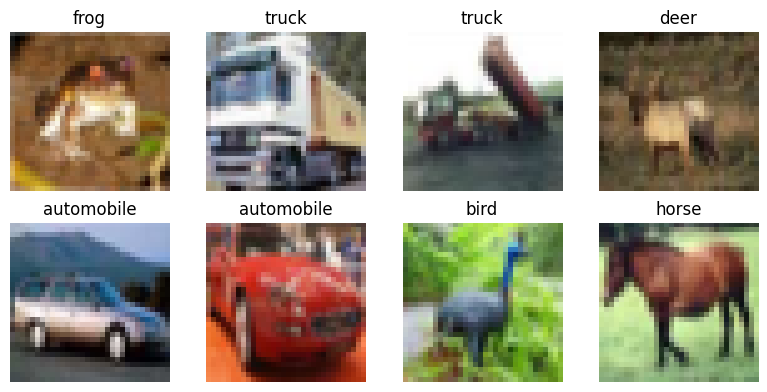

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print("Training samples:", x_train.shape)
print("Test samples:", x_test.shape)

# Visualize a few images
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(8,4))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()


preprocessing

In [3]:
# Normalize pixel values
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# One-hot encoding for labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


model architecture cnn

In [4]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 316,106 (1.21 MB)

 Trainable params: 315,914 (1.21 MB)

 Non-trainable params: 192 (768.00 B)

training

In [5]:
history = model.fit(x_train, y_train_cat, epochs=12, batch_size=64, validation_split=0.1)


Epoch 1/12
704/704 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.3842 - loss: 1.7723 - val_accuracy: 0.5772 - val_loss: 1.1950
Epoch 2/12
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5812 - loss: 1.1814 - val_accuracy: 0.5438 - val_loss: 1.3574
Epoch 3/12
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6543 - loss: 0.9860 - val_accuracy: 0.6518 - val_loss: 1.0219
Epoch 4/12
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6937 - loss: 0.8722 - val_accuracy: 0.5948 - val_loss: 1.1734
Epoch 5/12
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7292 - loss: 0.7724 - val_accuracy: 0.6206 - val_loss: 1.2695
Epoch 6/12
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7551 - loss: 0.6951 - val_accuracy: 0.6800 - val_loss: 0.9538
Epoch 7/12
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7796 - loss: 0.6168 - val_accuracy: 0.6704 - val_loss: 1.0148
Epoch 8/12
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7955 - loss: 0.5712 - val_accuracy: 

evaluate and plot results

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6313 - loss: 1.3332
Test Accuracy: 0.63


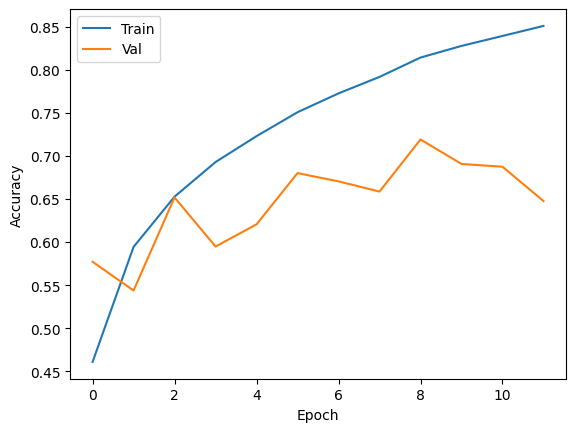

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f'Test Accuracy: {test_acc:.2f}')

# Plot training history
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


prediction and confusion matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


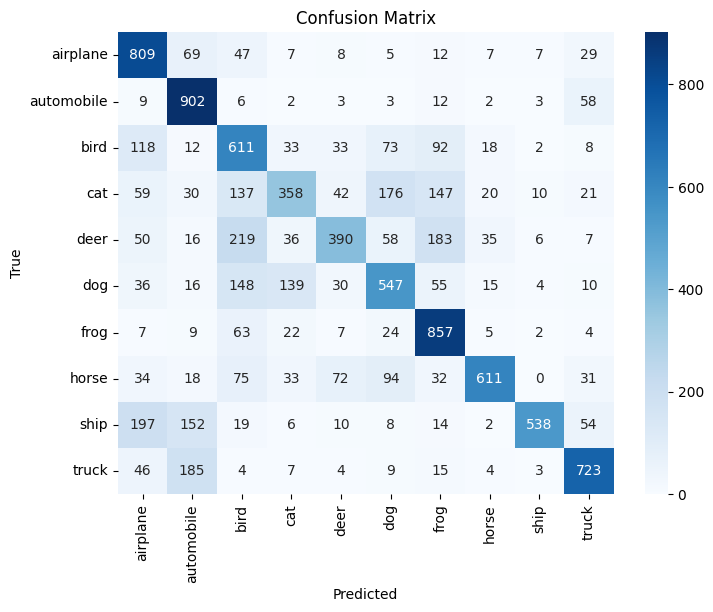

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_true = y_test.flatten()

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [8]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(include_top=False, input_shape=(32,32,3), weights='imagenet')
model_tl = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])
model_tl.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_tl.summary()
# You can train for fewer epochs if pressed for time:
# model_tl.fit(x_train, y_train_cat, epochs=5, batch_size=64, validation_split=0.1)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,781,642 (56.39 MB)

 Trainable params: 14,781,642 (56.39 MB)

 Non-trainable params: 0 (0.00 B)